Titulo: Machine Learning com conjunto de dados train titanic do kaggle 
Dados disponivel em: https://www.kaggle.com/c/titanic

O principal objetivo foi construir modelos a partir de algoritmos de aprendizagem de maquina e dentre eles selecionar o melhor, no conjunto de dados titanic há informações a respeito dos passageiros a bordo do navio, assim, o objetivo é construir modelos que consigam prever de acordo com essas informações se o passageiro sobreviveu ou não.

Primeiramente os pacotes foram carregados

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as srn
import statistics as sts
from sklearn.model_selection import train_test_split

Agora, importei o conjunto de dados

In [59]:
%cd "C:\Users\camil\Documents\aprendendo python"
df = pd.read_csv('train.csv')
df.head()

C:\Users\camil\Documents\aprendendo python


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


*Agora* vamos explorar os dados

1- Excluindo valores duplicados

In [60]:
print(df.shape)
df.drop_duplicates()
df.shape

(891, 12)


(891, 12)

Conforme observado não há valores duplicados,agora vamos para a segunda etapa.

2 - Verificação de valores nulos

In [61]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Podemos observar que na columa 'Age', "Cabin" e "Embarked" há valores faltantes

A coluna "Age" pode ser de extrema importancia, pois as crianças podem ter sido priorizadas nos botes salva vidas, ou até mesmo ficado para tras por nao conseguirem correr a tempo, por exemplo, iremos substituir os valores faltante pela mediana.

A coluna cabin é de extrema importancia, pois a localização da cabine pode influenciar se as pessoas conseguirem chegar mais falcimente nos botes ou não, porem há muitos dados faltantes e os valores não podem ser substituidos pois são unicos, infelizmente a coluna terá que ser descartada.

In [62]:
df = df.fillna(df.median())
df = df.drop("Cabin", axis =1)
df.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

A coluna "Embarked" tambem possui valores faltantes e será preenchida pela moda. Essa coluna apresenta o porto no qual o passageiro embarcou sendo: C = Cherbourg, Q = Queenstown, S = Southampton

In [63]:
print(df.groupby(['Embarked']).size())

Embarked
C    168
Q     77
S    644
dtype: int64


In [64]:
df['Embarked'] = df['Embarked'].fillna("S")
print(df.groupby(['Embarked']).size())

Embarked
C    168
Q     77
S    646
dtype: int64


In [65]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Vamos analisar se os valores das colunas estão condizentes

Começaremos pela coluna "Survived", essa coluna apresenta se o passageiro sobreviveu ou não sendo 0 para não e 1 para sim.

In [66]:
df.groupby(['Survived']).size()

Survived
0    549
1    342
dtype: int64

Nota-se que não há valores diferentes de 0 e 1

array([[<AxesSubplot:title={'center':'Survived'}>]], dtype=object)

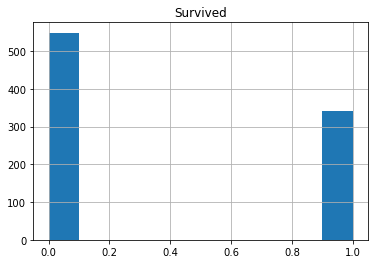

In [67]:
df.hist('Survived')

Analisando a coluna Pclass

In [68]:
df.groupby(['Pclass']).size()

Pclass
1    216
2    184
3    491
dtype: int64

Aparentemente não há nenhum valor incoerente

Analisando a coluna Sex que apresenta o genero dos passageiros, essa coluna tambem é de grande relevancia, pos certo genero pode ter sido priorizado nos botes.

In [69]:
df.groupby(['Sex']).size()

Sex
female    314
male      577
dtype: int64

Aparentemente não há nenhum valor incoerente, ou seja, um sexo inexistente.

Analisando a coluna Age:

In [70]:
negativo = df[df["Age"] < 0]
print(f'valores negativos: {negativo.shape}')
errado = df[df['Age']>=100]
print(f'valores errado: {errado.shape}')


valores negativos: (0, 11)
valores errado: (0, 11)


Assim, podemos observar que não há valores  abaixo de 0 nem acima de cem, pois conforme observados não há nenhuma linha correpondente a busca. Com o histograma podemos visualzar a distribuição da idade (coluna "Age").

<AxesSubplot:>

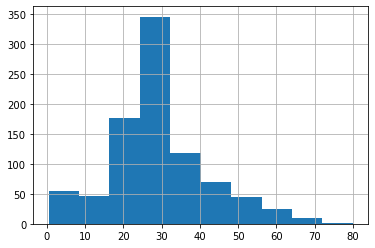

In [71]:
df["Age"].hist()

Agora vamos analisar a coluna Pclass que representa que tipo de classe o passageiro embarcou sendo 1 para primeira classe, 2 para segunda classe e 3 para terceira classe, essa coluna tambem é de relevancia, pois passageiros de classe mais alta tendem a ter maior acensão social, sendo assim priorizados nos botes ou até mesmo relacionados a suas cabines que podem ter ficado em partes especificas do navio.

In [72]:
df.groupby(['Pclass']).size()

Pclass
1    216
2    184
3    491
dtype: int64

<AxesSubplot:>

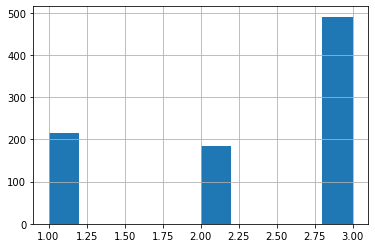

In [73]:
df["Pclass"].hist()

Os valores estão corretos aparentemente, podemos visualizar tambem que a maior parte dos passageiros embarcaram de terceira classe.

Agora iremos analisar a coluna "SibSp" que traz o número de irmãos e/ou cônjuges a bordo do Titanic:


In [74]:
df.groupby(['SibSp']).size()

SibSp
0    608
1    209
2     28
3     16
4     18
5      5
8      7
dtype: int64

Podemos observar que não há valores incoerentes como numeros negativos o valores muito grandes, observamos ainda que a maior parte das pessoas, 608 passageiros não possuiam nem irmãos ou esposas no navio.

A coluna "Parch" traz o núemro de pais e/ou filhos a bordo do navio:


In [75]:
df.groupby(['Parch']).size()

Parch
0    678
1    118
2     80
3      5
4      4
5      5
6      1
dtype: int64

Podemos observar que não há valores incoerentes como números negativos ou valores muito grandes, observamos que a maior parte dos passageiros, 678, não possuem pais ou filhos a bordo.

A coluna "Fare" apresenta as tarifas de cada passageiro:

In [76]:
print(df.groupby(['Fare']).size())

Fare
0.0000      15
4.0125       1
5.0000       1
6.2375       1
6.4375       1
            ..
227.5250     4
247.5208     2
262.3750     2
263.0000     4
512.3292     3
Length: 248, dtype: int64


In [77]:
negativo = df[df["Fare"] < 0]
print(f'valores negativos: {negativo.shape}')
errado = df[df['Fare']>=1000]
print(f'valores errado: {errado.shape}')

valores negativos: (0, 11)
valores errado: (0, 11)


Podemos observar que os valores aparentam estarem corretos.


A coluna "Ticket" traz os valores do ticket de cada passageiro, essse valores são unicos, seriam como um ID do passageiro.
A coluna "name" contem os nome dos passageiros.
Tanto a coluna "ticket" quanto a "name" não importantes para nosso modelo e serão excluidas.

In [78]:
df['Ticket'].head(100)


0            A/5 21171
1             PC 17599
2     STON/O2. 3101282
3               113803
4               373450
            ...       
95              374910
96            PC 17754
97            PC 17759
98              231919
99              244367
Name: Ticket, Length: 100, dtype: object

In [79]:
df = df.drop("Name", axis =1)
df = df.drop("Ticket", axis =1)
df.head()
df.shape

(891, 9)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


Agora vamos separar nossos dados em treino e teste para aplicarmos os algoritmos de machine learning

In [81]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score

In [82]:
X = df.drop("Survived", axis =1)
y = df["Survived"]

Vamos codificar a colunas categorica "Sex"

In [83]:
labelencoder1 = LabelEncoder()
X['Sex'] = labelencoder1.fit_transform(df['Sex'])
X.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,1,22.0,1,0,7.2500,S
1,2,1,0,38.0,1,0,71.2833,C
2,3,3,0,26.0,0,0,7.9250,S
3,4,1,0,35.0,1,0,53.1000,S
4,5,3,1,35.0,0,0,8.0500,S


Codificando a coluna categorica "Embarked"

In [84]:
columnTrabsformer = ColumnTransformer([('encoder', OneHotEncoder(), [7])], remainder= 'passthrough')

In [85]:
X = np.array(columnTrabsformer.fit_transform(X), dtype = np.float64)

Agora com a coluna ja codificada vamos eliminar uma das 3 criadas para diminuir a correlação entre as colunas

In [86]:
X = X[:, 1:]

In [87]:
X[:3,:]

array([[ 0.    ,  1.    ,  1.    ,  3.    ,  1.    , 22.    ,  1.    ,
         0.    ,  7.25  ],
       [ 0.    ,  0.    ,  2.    ,  1.    ,  0.    , 38.    ,  1.    ,
         0.    , 71.2833],
       [ 0.    ,  1.    ,  3.    ,  3.    ,  0.    , 26.    ,  0.    ,
         0.    ,  7.925 ]])

Agora finalmente vamos separar e treino e teste, o teste terá cerca de 30% da amostra.

In [88]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.3)

Agora vamos utilizar diferente algoritmos e determinar qual será o melhor modelo:

In [107]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

1 - Arvore de Decisao

Ajuste do modelo

In [90]:
arvore1 = DecisionTreeClassifier()
arvore1.fit(X_treino, y_treino)
y_prev = arvore1.predict(X_teste)


Matriz de confusão

In [91]:
m_confusao = confusion_matrix(y_teste, y_prev)
m_confusao

array([[137,  28],
       [ 32,  71]], dtype=int64)

Acuracia do modelo:

In [92]:
acerto = accuracy_score(y_teste, y_prev)
acerto

0.7761194029850746

O modelo teve um acerto de 75%

2 - Random Forest

Ajuste do modelo

In [93]:
algoritmo = RandomForestClassifier(n_estimators = 9)
modelo = algoritmo.fit(X_treino, y_treino) 
y_pred2 = modelo.predict(X_teste)

Matriz de confusão:

In [94]:
m_confusaorf = confusion_matrix(y_teste, y_pred2)
m_confusaorf

array([[146,  19],
       [ 30,  73]], dtype=int64)

Acuracia do modelo:

In [95]:
acertorf = accuracy_score(y_teste, y_pred2)
acertorf

0.8171641791044776

o modelo teve uma certo de aproximadamente 81,34%

3 - Regressão logistica

Ajustando o modeloe realizando a previsão:

In [96]:
algoritmo2 = LogisticRegression()


In [97]:
algoritmo2.fit(X_treino, y_treino)


C:\Users\camil\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [98]:
y_pred3 = algoritmo2.predict(X_teste)

Matriz de confusão:

In [99]:
m_confusaor2 = confusion_matrix(y_teste, y_pred3)
m_confusaor2

array([[139,  26],
       [ 34,  69]], dtype=int64)

Acuracia do modelo:

In [100]:
acertor2 = accuracy_score(y_teste, y_pred3)
acertor2

0.7761194029850746

o modelo teve uma certo de aproximadamente 78,36%

4 - Support Vector Machine - SVM

Padronização dos dados:

In [101]:
sc = StandardScaler()
X_treinop = sc.fit_transform(X_treino)
X_testep = sc.transform(X_teste)

Ajustando o modelo e realizando a previsão:

In [103]:
algoritmo3 = SVC(kernel = 'linear', random_state = 3)
algoritmo3.fit(X_treinop, y_treino)

SVC(kernel='linear', random_state=3)

In [104]:
y_pred4 = algoritmo3.predict(X_teste)

Matriz de confusão:


In [105]:
m_confusaor3 = confusion_matrix(y_teste, y_pred4)
m_confusaor3


array([[143,  22],
       [ 49,  54]], dtype=int64)

Acuracia do modelo:

In [106]:
acertor3 = accuracy_score(y_teste, y_pred4)
acertor3

0.7350746268656716

A acuracia foi de 73,51%

5 - K-Nearest neighbors (K-NN)

Ajustando o modelo e realizando a revisão:

In [108]:
algoritmo4 = KNeighborsClassifier(n_neighbors = 3)
algoritmo4.fit(X_treinop, y_treino)
y_pred5 = algoritmo4.predict(X_testep)

Matriz de confusão :

In [109]:
m_confusaor4 = confusion_matrix(y_teste, y_pred5)
m_confusaor4

array([[133,  32],
       [ 33,  70]], dtype=int64)

Acuracia do modelo:

In [110]:
acertor4 = accuracy_score(y_teste, y_pred5)
acertor4

0.7574626865671642

Podemos observar que o melhor modelo foi o obtido pelo algoritmo de RandomForest.